For Text Mining assignment

 ONE:
1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)
 TWO:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
!pip install -U textblob

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from textblob import TextBlob

 Read Data

In [ ]:
data = pd.read_csv("/content/Elon_musk (2).csv",encoding="latin-1")
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [ ]:
data.shape

(1999, 10)

Number of Words

In [ ]:
#Number of Words in single tweet
data['word_count'] = data['Text'].apply(lambda x: len(str(x).split(" ")))
data[['Text','word_count']].head()

,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


Number of Characters

In [ ]:
#Number of characters in single tweet
data['char_count'] = data['Text'].str.len() ## this also includes spaces
data[['Text','char_count']].head()

,Text,char_count
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104


 Average Word Length

In [ ]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

data['avg_word'] = data['Text'].apply(lambda x: avg_word(x))
data[['Text','avg_word']].head()

,Text,avg_word
0,@kunalb11 Im an alien,4.750000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,5.384615
2,@joerogan @Spotify Great interview!,8.000000
3,@gtera27 Doge is underestimated,7.000000
4,@teslacn Congratulations Tesla China for amazi...,5.176471


Number of stopwords

In [ ]:
stop = stopwords.words('english')

data['stopwords'] = data['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Text','stopwords']].head()

,Text,stopwords
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,4
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,5


Number of Special Characters

In [ ]:
data['hastags'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
data[['Text','hastags']].head()

,Text,hastags
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,2
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,1


Number of Numerics

In [ ]:
data['numerics'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Text','numerics']].head()

,Text,numerics
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


 Number of Upper Case Words

In [ ]:
data['upper'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['Text','upper']].head()

,Text,upper
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0


Pre - Processing

In [ ]:
# Lower Case:
data['Text'] = data['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Text'].head()

0                               @kunalb11 im an alien
1    @id_aa_carmack ray tracing on cyberpunk with h...
2                  @joerogan @spotify great interview!
3                      @gtera27 doge is underestimated
4    @teslacn congratulations tesla china for amazi...
Name: Text, dtype: object

 Removing Punctuation

In [ ]:
tweets=[Text.strip() for Text in data.Text] # remove both the leading and the trailing characters
tweets=[Text for Text in tweets if Text] # removes empty strings, because they are considered in Python as False
tweets[0:10]

['kunalb11 im alien',
 'id_aa_carmack ray tracing cyberpunk hdr nextlevel tried',
 'joerogan spotify interview',
 'gtera27 doge underestimated',
 'teslacn congratulation china amazing execution last year next even',
 'happy new year ox httpstco9wfkmyu2oj',
 'frodo underdoge thought would fail httpstcozgxjfdzzrm',
 'owensparks_ anonyx10 haha thanks',
 'anonyx10 indeed tweet definitely represent realworld time allocation',
 'entertaining outcome likely']

In [ ]:
# Joining the list into one string/text
tweets_text=' '.join(tweets)
tweets_text

'kunalb11 im alien id_aa_carmack ray tracing cyberpunk hdr nextlevel tried joerogan spotify interview gtera27 doge underestimated teslacn congratulation china amazing execution last year next even happy new year ox httpstco9wfkmyu2oj frodo underdoge thought would fail httpstcozgxjfdzzrm owensparks_ anonyx10 haha thanks anonyx10 indeed tweet definitely represent realworld time allocation entertaining outcome likely givedirectly sent agree clubhouse kanyewest httpstco3rwe9uhsts geoffkeighley unrealengine getting real bought dogecoin lil x toddler hodler joshmanmode definitely issue sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy u0001f923u0001f923 true power haha httpstcofc9uhqsd7o freewalletorg crypto wallet wont give private key avoided cost freewalletorg app suck nasa selected falcon heavy launch first two element lunar gateway together one mission httpstco3pwt ajtourville blkmdl3 rationaletienne adamklotz_ predict cash flow reasona

In [ ]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens=tknzr.tokenize(tweets_text)
print(tweets_tokens)

['kunalb', '11', 'im', 'alien', 'id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'joerogan', 'spotify', 'interview', 'gtera', '27', 'doge', 'underestimated', 'teslacn', 'congratulation', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco', '9wfkmyu2oj', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'httpstcozgxjfdzzrm', 'owensparks', '_', 'anonyx', '10', 'haha', 'thanks', 'anonyx', '10', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'givedirectly', 'sent', 'agree', 'clubhouse', 'kanyewest', 'httpstco', '3rwe9uhsts', 'geoffkeighley', 'unrealengine', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'definitely', 'issue', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'u0001f923u0001f923', 'true', 'power',

In [ ]:
# Again Joining the list into one string/text
tweets_tokens_text=' '.join(tweets_tokens)
tweets_tokens_text

'kunalb 11 im alien id_aa_carmack ray tracing cyberpunk hdr nextlevel tried joerogan spotify interview gtera 27 doge underestimated teslacn congratulation china amazing execution last year next even happy new year ox httpstco 9wfkmyu2oj frodo underdoge thought would fail httpstcozgxjfdzzrm owensparks _ anonyx 10 haha thanks anonyx 10 indeed tweet definitely represent realworld time allocation entertaining outcome likely givedirectly sent agree clubhouse kanyewest httpstco 3rwe9uhsts geoffkeighley unrealengine getting real bought dogecoin lil x toddler hodler joshmanmode definitely issue sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy u0001f923u0001f923 true power haha httpstcofc 9uhqsd7o freewalletorg crypto wallet wont give private key avoided cost freewalletorg app suck nasa selected falcon heavy launch first two element lunar gateway together one mission httpstco 3pwt ajtourville blkmdl 3 rationaletienne adamklotz _ predict cash f

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [ ]:
# Remove Punctuations
no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'kunalb 11 im alien idaacarmack ray tracing cyberpunk hdr nextlevel tried joerogan spotify interview gtera 27 doge underestimated teslacn congratulation china amazing execution last year next even happy new year ox httpstco 9wfkmyu2oj frodo underdoge thought would fail httpstcozgxjfdzzrm owensparks  anonyx 10 haha thanks anonyx 10 indeed tweet definitely represent realworld time allocation entertaining outcome likely givedirectly sent agree clubhouse kanyewest httpstco 3rwe9uhsts geoffkeighley unrealengine getting real bought dogecoin lil x toddler hodler joshmanmode definitely issue sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy u0001f923u0001f923 true power haha httpstcofc 9uhqsd7o freewalletorg crypto wallet wont give private key avoided cost freewalletorg app suck nasa selected falcon heavy launch first two element lunar gateway together one mission httpstco 3pwt ajtourville blkmdl 3 rationaletienne adamklotz  predict cash flow 

In [ ]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'kunalb 11 im alien idaacarmack ray tracing cyberpunk hdr nextlevel tried joerogan spotify interview gtera 27 doge underestimated teslacn congratulation china amazing execution last year next even happy new year ox  9wfkmyu2oj frodo underdoge thought would fail  owensparks  anonyx 10 haha thanks anonyx 10 indeed tweet definitely represent realworld time allocation entertaining outcome likely givedirectly sent agree clubhouse kanyewest  3rwe9uhsts geoffkeighley unrealengine getting real bought dogecoin lil x toddler hodler joshmanmode definitely issue sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy u0001f923u0001f923 true power haha  9uhqsd7o freewalletorg crypto wallet wont give private key avoided cost freewalletorg app suck nasa selected falcon heavy launch first two element lunar gateway together one mission  3pwt ajtourville blkmdl 3 rationaletienne adamklotz  predict cash flow reasonably well starlink ipo rationaletienne adamklo

In [ ]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['kunalb', '11', 'im', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'joerogan', 'spotify', 'interview', 'gtera', '27', 'doge', 'underestimated', 'teslacn', 'congratulation', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', '9wfkmyu2oj', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'owensparks', 'anonyx', '10', 'haha', 'thanks', 'anonyx', '10', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'givedirectly', 'sent', 'agree', 'clubhouse', 'kanyewest', '3rwe9uhsts', 'geoffkeighley', 'unrealengine', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'definitely', 'issue', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'u0001f923u0001f923', 'true', 'power', 'haha', '9uhqsd7o', 'freewalletorg', 'crypto', 'wall

In [ ]:
data['Text'] = data['Text'].str.replace('[^\w\s]','')
data['Text'].head()

<ipython-input-15-5a2099d0f9da>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Text'] = data['Text'].str.replace('[^\w\s]','')


0                                 kunalb11 im an alien
1    id_aa_carmack ray tracing on cyberpunk with hd...
2                     joerogan spotify great interview
3                       gtera27 doge is underestimated
4    teslacn congratulations tesla china for amazin...
Name: Text, dtype: object

Removal of Stop Words

In [ ]:
stop = stopwords.words('english')
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations tesla china amazing ex...
Name: Text, dtype: object

Common word removal

In [ ]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:10]
freq

spacex            239
amp               218
tesla             166
erdayastronaut    142
rt                127
ppathole          123
flcnhvy           114
yes                86
great              76
teslaownerssv      73
dtype: int64

In [ ]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

Rare Words Removal

In [ ]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[-10:]
freq

nyquil                1
musk                  1
negati                1
httpstco6ohta09s5l    1
carousel              1
joeingeneral          1
andrewbogut           1
typical               1
unusual               1
altho                 1
dtype: int64

In [ ]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

In [ ]:
data['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                    kunalb11 in alien
1    id_aa_carmack ray tracing cyberpunk her nextle...
2                           joerogan specify interview
3                          gtera27 done underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

Tokenization

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Tokens count
len(text_tokens)

13610

In [ ]:
# Remove Stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['kunalb', '11', 'im', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'joerogan', 'spotify', 'interview', 'gtera', '27', 'doge', 'underestimated', 'teslacn', 'congratulation', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', '9wfkmyu2oj', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'owensparks', 'anonyx', '10', 'thanks', 'anonyx', '10', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'givedirectly', 'sent', 'agree', 'clubhouse', 'kanyewest', '3rwe9uhsts', 'geoffkeighley', 'unrealengine', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'definitely', 'issue', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'u0001f923u0001f923', 'true', 'power', '9uhqsd7o', 'freewalletorg', 'crypto', 'wallet', 'wont', 'gi

In [ ]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission', '3pwt', 'ajtourville', 'blkmdl', '3', 'rationaletienne', 'adamklotz', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'rationaletienne', 'adamklotz', 'starlink', 'staggeringly', 'difficult', 'technical', 'economic', 'endeavor', 'however', '9z8ac6skqx', 'rationaletienne', 'adamklotz', 'need', 'pas', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', '7j1c92hdjl', 'idaacarmack', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequestered', 'net', 'value', 'product', 'made', 'must', 'scalable', 'g', '7qwsgw', 'adamklotz', 'meant', 'price', 'country', 'difference', 'tax', 'shipping', 'tobyliiiiiiiiii', 'intended', 'earth', 'may', 'idea', 'apply', 'mar', 'cryptoshrikar', 'coindesk', 'danzpalmer', 'u0001f923u0001f923', 'xprize', 'team', 'manage', '100m', 'carbon', 'capture', 'prize', '5ianl0r', 'sruhle', 'everyone', 'receives', 'stock', 'comp

In [ ]:
TextBlob(data['Text'][1]).words

WordList(['id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried'])

Stemming

In [ ]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['nasa', 'select', 'falcon', 'heavi', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'togeth', 'one', 'mission', '3pwt', 'ajtourvil', 'blkmdl', '3', 'rationaletienn', 'adamklotz', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'rationaletienn', 'adamklotz', 'starlink', 'staggeringli', 'difficult', 'technic', 'econom', 'endeavor', 'howev', '9z8ac6skqx', 'rationaletienn', 'adamklotz', 'need', 'pa', 'deep', 'chasm', 'neg', 'cash', 'flow', 'next', 'year', '7j1c92hdjl', 'idaacarmack', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequest', 'net', 'valu', 'product', 'made', 'must', 'scalabl', 'g', '7qwsgw', 'adamklotz', 'meant', 'price', 'countri', 'differ', 'tax', 'ship', 'tobyliiiiiiiiii', 'intend', 'earth', 'may', 'idea', 'appli', 'mar', 'cryptoshrikar', 'coindesk', 'danzpalm', 'u0001f923u0001f923', 'xprize', 'team', 'manag', '100m', 'carbon', 'captur', 'prize', '5ianl0r', 'sruhl', 'everyon', 'receiv', 'stock', 'comp', 'stockopt', 'take', 'tabl', 'that', 'your', 'm

In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


0                                    kunalb11 im alien
1    id_aa_carmack ray trace cyberpunk hdr nextleve...
2                           joerogan spotifi interview
3                              gtera27 doge underestim
4    teslacn congratul china amaz execut last year ...
Name: Text, dtype: object

 Lemmatization

In [ ]:
from textblob import Word

In [ ]:
data['Text'] = data['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulation china amazing execution...
Name: Text, dtype: object

In [ ]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

kunalb 11 im alien idaacarmack ray tracing cyberpunk hdr nextlevel tried joerogan spotify interview gtera 27 doge underestimated teslacn congratulation china amazing execution last year next even happy new year ox 9wfkmyu2oj frodo underdoge thought would fail owensparks anonyx 10 thanks anonyx 10 indeed tweet definitely represent realworld time allocation entertaining outcome likely givedirectly sent agree clubhouse kanyewest 3rwe9uhsts geoffkeighley unrealengine getting real bought dogecoin lil x toddler hodler joshmanmode definitely issue sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy u0001f923u0001f923 true power 9uhqsd7o freewalletorg crypto wallet wont give private key avoided cost freewalletorg app suck nasa selected falcon heavy launch first two element lunar gateway together one mission 3pwt ajtourville blkmdl 3 rationaletienne adamklotz predict cash flow reasonably well starlink ipo rationaletienne adamklotz starlink stagge

In [ ]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['kunalb', '11', 'I', 'm', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'try', 'joerogan', 'spotify', 'interview', 'gtera', '27', 'doge', 'underestimate', 'teslacn', 'congratulation', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', '9wfkmyu2oj', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'owenspark', 'anonyx', '10', 'thank', 'anonyx', '10', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertain', 'outcome', 'likely', 'givedirectly', 'send', 'agree', 'clubhouse', 'kanyewest', '3rwe9uhsts', 'geoffkeighley', 'unrealengine', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'u0001f923u0001f923', 'true', 'power', '9uhqsd7o', 'freewalletorg', 'crypto', 'wallet', 'will', 'not', 'give', 'priva

In [ ]:
clean_tweets=' '.join(lemmas)
clean_tweets

'kunalb 11 I m alien idaacarmack ray trace cyberpunk hdr nextlevel try joerogan spotify interview gtera 27 doge underestimate teslacn congratulation china amazing execution last year next even happy new year ox 9wfkmyu2oj frodo underdoge thought would fail owenspark anonyx 10 thank anonyx 10 indeed tweet definitely represent realworld time allocation entertain outcome likely givedirectly send agree clubhouse kanyewest 3rwe9uhsts geoffkeighley unrealengine get real buy dogecoin lil x toddler hodler joshmanmode definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account astrojordy u0001f923u0001f923 true power 9uhqsd7o freewalletorg crypto wallet will not give private key avoid cost freewalletorg app suck nasa select falcon heavy launch first two element lunar gateway together one mission 3pwt ajtourville blkmdl 3 rationaletienne adamklotz predict cash flow reasonably well starlink ipo rationaletienne adamklotz starlink staggeringly difficult tec

Feature Extaction

In [ ]:
#Using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(lemmas)

In [ ]:
print(cv.vocabulary_)

{'kunalb': 2569, '11': 76, 'alien': 803, 'idaacarmack': 2317, 'ray': 3443, 'trace': 4287, 'cyberpunk': 1510, 'hdr': 2210, 'nextlevel': 2997, 'try': 4322, 'joerogan': 2491, 'spotify': 3926, 'interview': 2423, 'gtera': 2164, '27': 198, 'doge': 1660, 'underestimate': 4450, 'teslacn': 4144, 'congratulation': 1408, 'china': 1293, 'amazing': 826, 'execution': 1869, 'last': 2586, 'year': 4704, 'next': 2996, 'even': 1840, 'happy': 2192, 'new': 2993, 'ox': 3143, '9wfkmyu2oj': 692, 'frodo': 2033, 'underdoge': 4449, 'thought': 4213, 'would': 4683, 'fail': 1905, 'owenspark': 3139, 'anonyx': 851, '10': 69, 'thank': 4178, 'indeed': 2364, 'tweet': 4341, 'definitely': 1564, 'represent': 3524, 'realworld': 3467, 'time': 4230, 'allocation': 807, 'entertain': 1797, 'outcome': 3120, 'likely': 2644, 'givedirectly': 2117, 'send': 3707, 'agree': 774, 'clubhouse': 1334, 'kanyewest': 2525, '3rwe9uhsts': 317, 'geoffkeighley': 2097, 'unrealengine': 4478, 'get': 2102, 'real': 3456, 'buy': 1189, 'dogecoin': 1662, 

In [ ]:
print(tweetscv.toarray().shape)

(13685, 4735)


Advanced Text Processing

In [ ]:
#N-grams

In [ ]:
TextBlob(data['Text'][0]).ngrams(2)

[WordList(['kunalb11', 'im']), WordList(['im', 'alien'])]

 Term frequency

In [ ]:
tf1 = (data['Text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,id_aa_carmack,1
1,ray,1
2,tracing,1
3,cyberpunk,1
4,hdr,1
5,nextlevel,1
6,tried,1


 Inverse Document Frequency

In [ ]:
for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Text'].str.contains(word)])))

tf1

,words,tf,idf
0,id_aa_carmack,1,4.166415
1,ray,1,5.035453
2,tracing,1,7.600402
3,cyberpunk,1,5.115496
4,hdr,1,6.907255
5,nextlevel,1,6.907255
6,tried,1,5.808643


Term Frequency – Inverse Document Frequency (TF-IDF)

In [ ]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,id_aa_carmack,1,4.166415,4.166415
1,ray,1,5.035453,5.035453
2,tracing,1,7.600402,7.600402
3,cyberpunk,1,5.115496,5.115496
4,hdr,1,6.907255,6.907255
5,nextlevel,1,6.907255,6.907255
6,tried,1,5.808643,5.808643


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
vect = tfidf.fit_transform(data['Text'])
vect

<1999x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 7374 stored elements in Compressed Sparse Row format>

Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(data['Text'])
data_bow

<1999x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 8020 stored elements in Compressed Sparse Row format>

Sentiment Analysis

In [ ]:
data['Text'][:5].apply(lambda x: TextBlob(x).sentiment)

0                                 (-0.25, 0.75)
1                                    (0.0, 0.0)
2                                    (0.0, 0.0)
3                                    (0.0, 0.0)
4    (0.20000000000000004, 0.32222222222222224)
Name: Text, dtype: object

In [ ]:
data['sentiment'] = data['Text'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Text','sentiment']].head()

,Text,sentiment
0,kunalb11 im alien,-0.25
1,id_aa_carmack ray tracing cyberpunk hdr nextle...,0.00
2,joerogan spotify interview,0.00
3,gtera27 doge underestimated,0.00
4,teslacn congratulation china amazing execution...,0.20


Perform emotion mining

In [ ]:
! pip install future

In [ ]:
!pip install -U future

In [ ]:
import codecs
import re
import copy
import collections
import pandas as pd
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
import matplotlib

%matplotlib inline

In [ ]:
from __future__ import division
import os
from nltk.corpus import twitter_samples

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
with codecs.open("/content/positive-words (1).txt", "r", encoding="utf-8") as p:
    pos = p.read()
    print(pos)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Positive
;
; This file contains a list of POSITIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expresse

In [ ]:
with codecs.open("/content/negative-words (1).txt", "r", encoding="ISO-8859-1") as n:
    neg = n.read()
    print(neg)

;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
; 
; Opinion Lexicon: Negative
;
; This file contains a list of NEGATIVE opinion words (or sentiment words).
;
; This file and the papers can all be downloaded from 
;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html
;
; If you use this list, please cite one of the following two papers:
;
;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
;       Proceedings of the ACM SIGKDD International Conference on Knowledge 
;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
;       Washington, USA, 
;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing 
;       and Comparing Opinions on the Web." Proceedings of the 14th 
;       International World Wide Web conference (WWW-2005), May 10-14, 
;       2005, Chiba, Japan.
;
; Notes: 
;    1. The appearance of an opinion word in a sentence does not necessarily  
;       mean that the sentence expres

In [ ]:
with codecs.open("/content/stop (1).txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop)

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
against
ain't
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
apart
appear
appreciate
appropriate
are
aren't
around
as
aside
ask
asking
associated
at
available
away
awfully
b
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
believe
below
beside
besides
best
better
between
beyond
both
brief
but
by
c
c'mon
c's
came
can
can't
cannot
cant
cause
causes
certain
certainly
changes
clearly
co
com
come
comes
concerning
consequently
consider
considering
contain
containing
contains
corresponding
could
couldn't
course
currently
d
definitely
described
despite
did
didn't
different
do
does
doesn't
doing
don't
done
down
downwards
during
e
each
edu
eg
eight
either
else
elsewhere
enough
entirely
especially
et
etc
even
ever
every
everybody
everyone
everything
everywhere
ex
exactly
example

In [ ]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(tweets))
sentences

['kunalb11 im alien id_aa_carmack ray tracing cyberpunk hdr nextlevel tried joerogan spotify interview gtera27 doge underestimated teslacn congratulation china amazing execution last year next even happy new year ox httpstco9wfkmyu2oj frodo underdoge thought would fail httpstcozgxjfdzzrm owensparks_ anonyx10 haha thanks anonyx10 indeed tweet definitely represent realworld time allocation entertaining outcome likely givedirectly sent agree clubhouse kanyewest httpstco3rwe9uhsts geoffkeighley unrealengine getting real bought dogecoin lil x toddler hodler joshmanmode definitely issue sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy u0001f923u0001f923 true power haha httpstcofc9uhqsd7o freewalletorg crypto wallet wont give private key avoided cost freewalletorg app suck nasa selected falcon heavy launch first two element lunar gateway together one mission httpstco3pwt ajtourville blkmdl3 rationaletienne adamklotz_ predict cash flow reason

In [ ]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,kunalb11 im alien id_aa_carmack ray tracing cy...


Generate Word Cloud

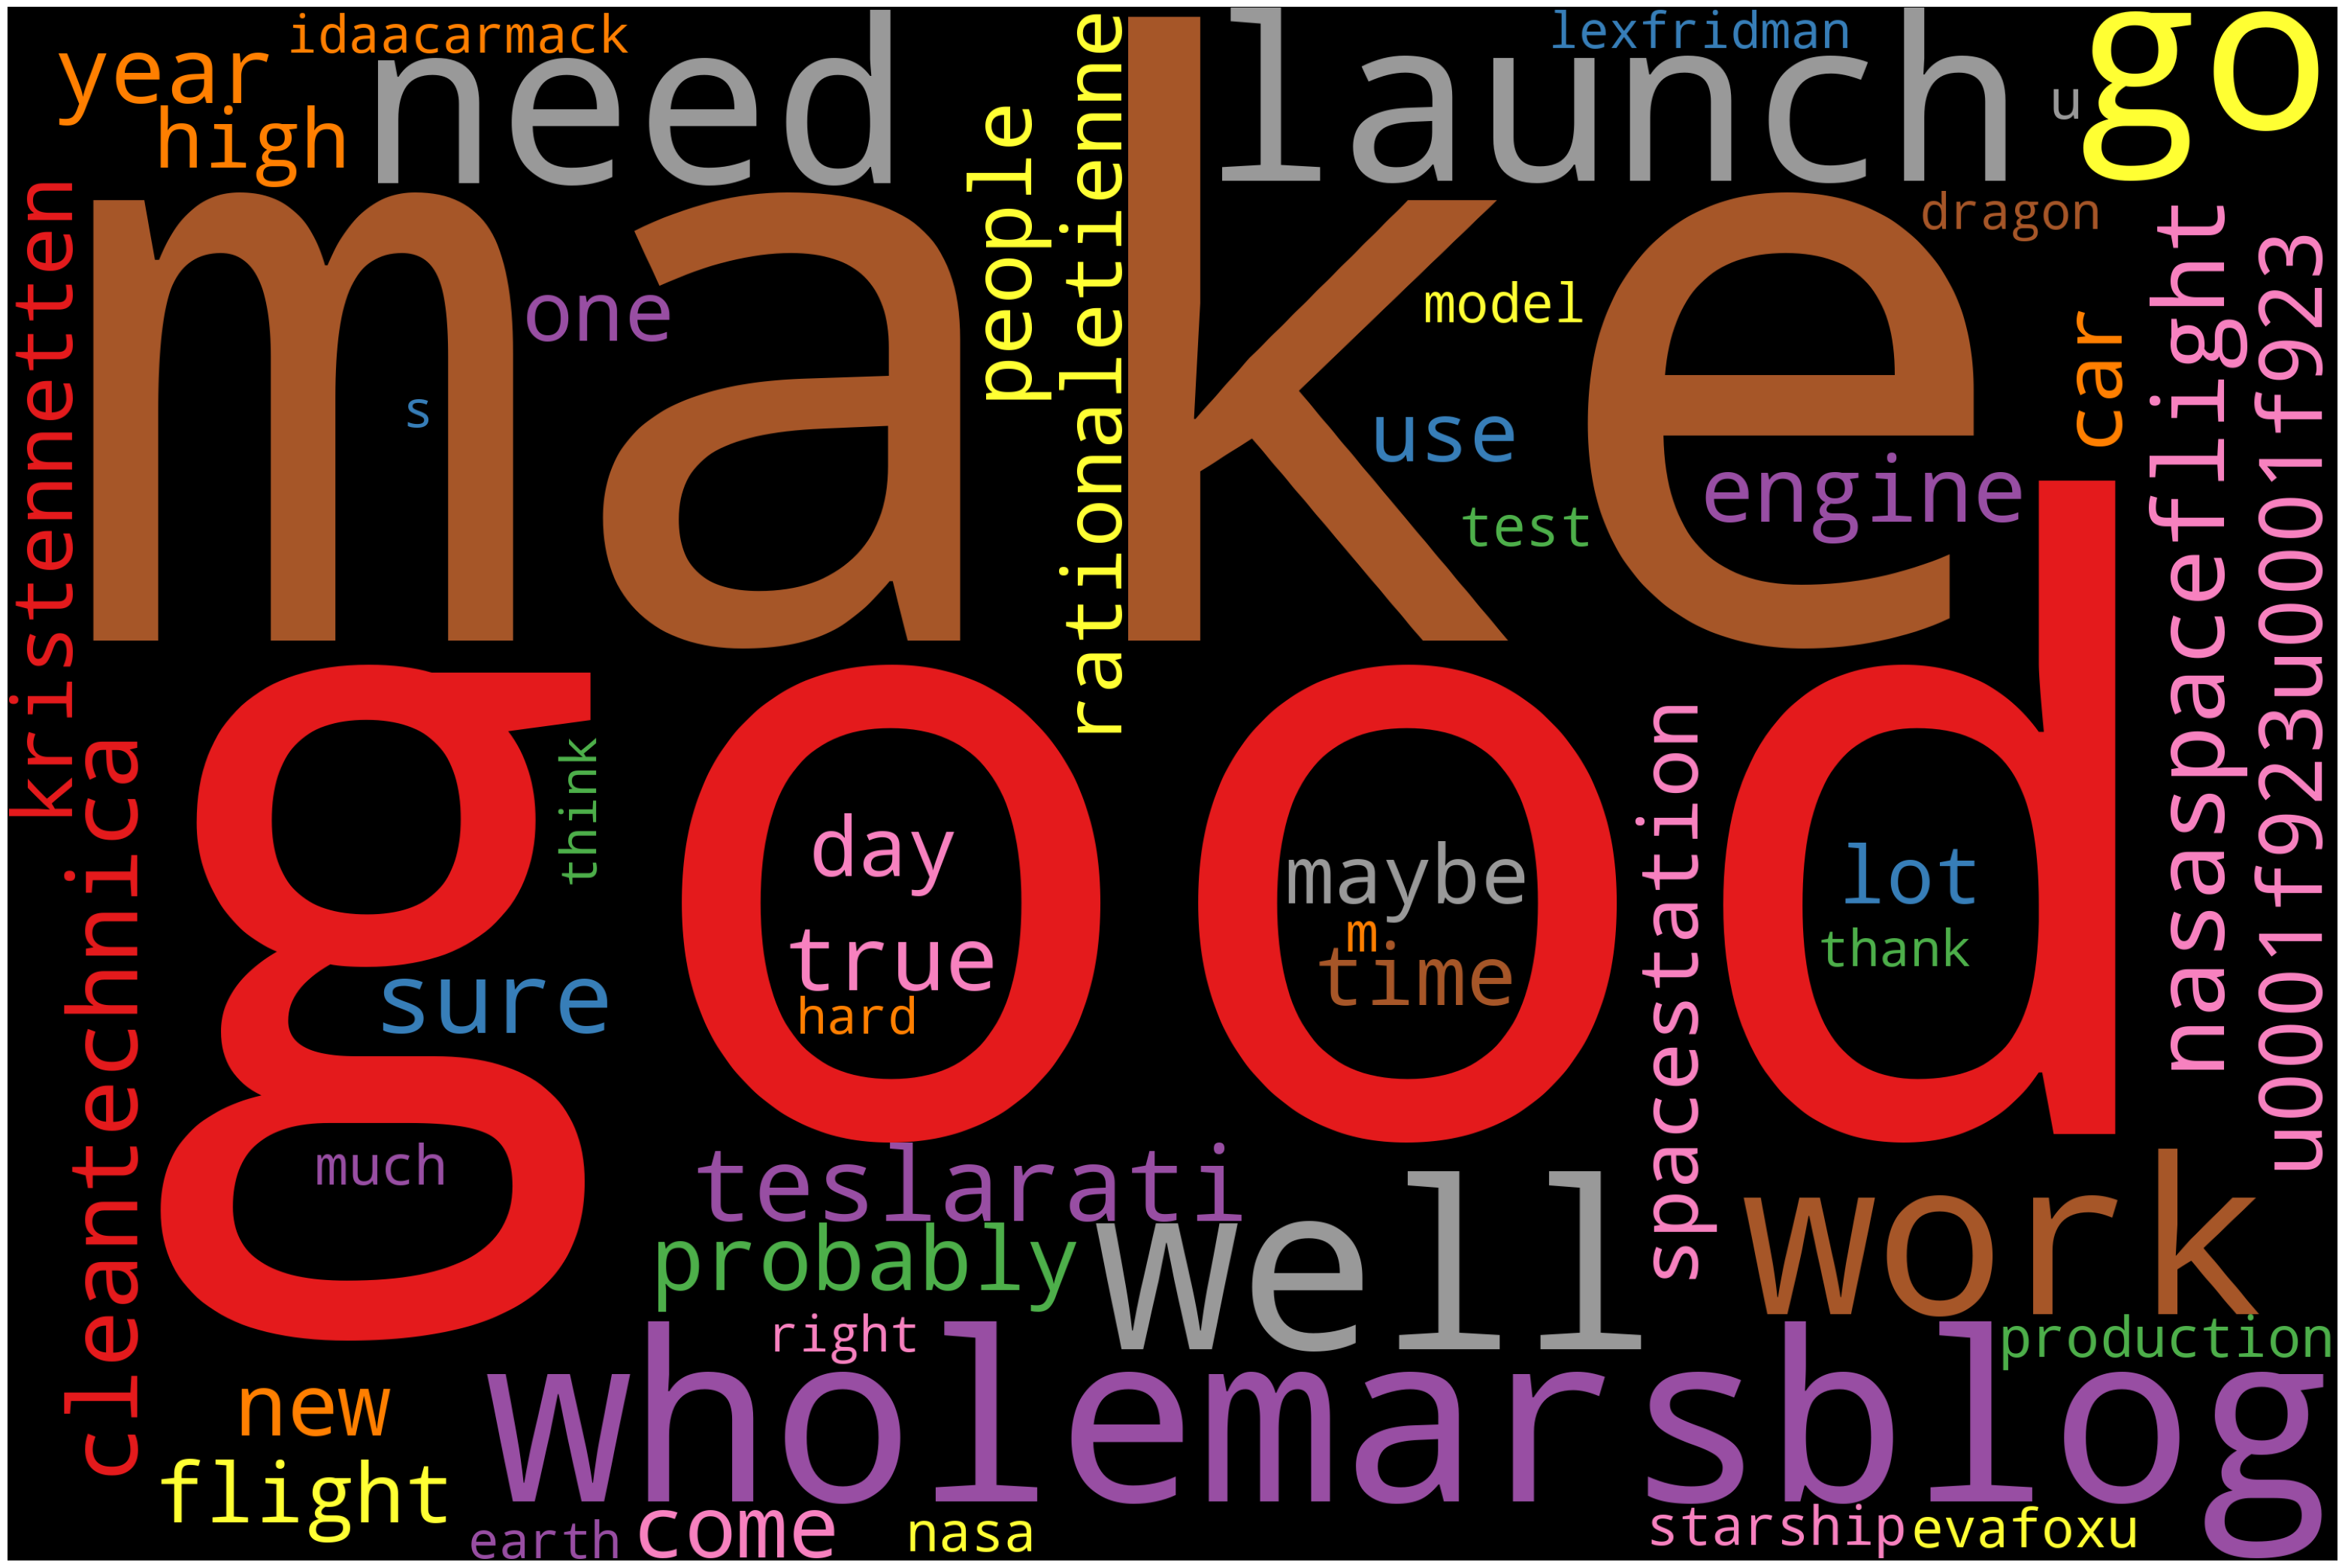

In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

Named Entity Recognition (NER)

In [ ]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_tweets
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
for token in doc_block[100:200]:
    print(token,token.pos_)

app PROPN
suck PROPN
nasa PROPN
select PROPN
falcon PROPN
heavy ADJ
launch NOUN
first ADJ
two NUM
element NOUN
lunar ADJ
gateway NOUN
together ADV
one NUM
mission NOUN
3pwt PROPN
ajtourville PROPN
blkmdl PROPN
3 NUM
rationaletienne NOUN
adamklotz NOUN
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink VERB
ipo PROPN
rationaletienne PROPN
adamklotz PROPN
starlink NOUN
staggeringly ADV
difficult ADJ
technical ADJ
economic ADJ
endeavor NOUN
however ADV
9z8ac6skqx PROPN
rationaletienne NOUN
adamklotz PROPN
need PROPN
pas PROPN
deep ADJ
chasm ADJ
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
7j1c92hdjl NUM
idaacarmack NOUN
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
must AUX
scalable VERB
g ADP
7qwsgw PROPN
adamklotz NOUN
mean NOUN
price NOUN
country NOUN
difference NOUN
tax NOUN
shipping NOUN
tobyliiiiiiiiii NOUN
intend VERB
earth NOUN
may AUX
idea NOUN
apply VERB
mar PROPN
cryptoshrikar PROPN
coindesk PROPN
d

In [ ]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['unit', 'time', 't', 'michaelgalanin', 'michaelhodapp', 'launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improve', 'ship', 'booster', 'mass', 'work', 'tonight', 'ðogecoin', 'video', 'people', 'speak', 'nivetha', 'lexfridman', 'cute', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'let', 'doge', 'come', 'fun', 'snoopdogg', 'simplicity', 'genius', 'u0001f923u0001f923', 'wapodavenport', 'dogecoinrich', 'u0001f923u0001f923', 'astrojordy', 'decade', 'work', 'look', 'note', 'email', 'text', 'astrojordy', 'lesson', 'learn', 'time', 'tell', 'story', 'theonion', 'read', 'thebabylonbee', 'kingdom', 'dumdin', 'hear', 'name', 'year', 'kristennetten', 's', 'kristennetten', 'owenspark', 'thing', 'restaurant', 'hang', 'currency', 'earth', 'redlineshifter', 'scratch', 'destiny', 'franz', 'say', 'ship', 'landing', 'burn', 'solution', 'adamklotz', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'seem', 'raptor', 'brendan', 'falcon', 'launch', 'collect', 'galaxy', 'explore', 'la

In [ ]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,make,64
1,launch,61
2,year,48
3,work,48
4,need,47
5,go,46
6,come,41
7,get,39
8,day,38
9,time,35


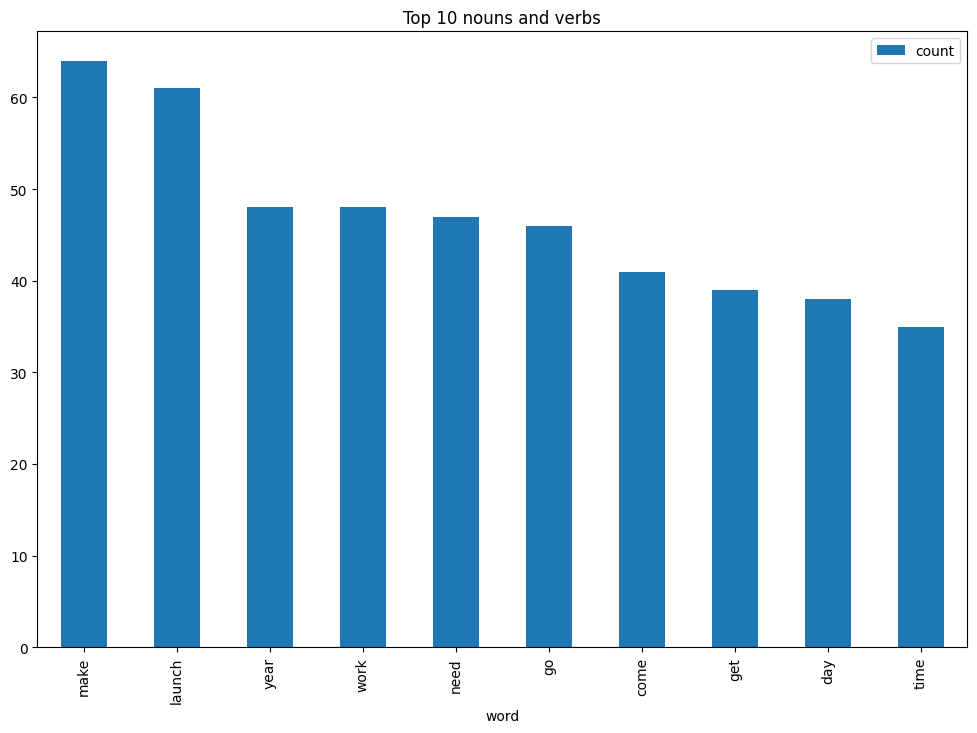

In [ ]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');
